#  EDA

In [1]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import os, json, math, time
from tqdm.notebook import tqdm_notebook
import glob
import tmdbsimple as tmdb
import sqlalchemy
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

In [2]:
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files

['Data/final_tmdb_data_2001.csv.gz', 'Data/final_tmdb_data_2002.csv.gz']

In [3]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,14.022,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,"[{'id': 85, 'logo_path': None, 'name': 'Konrad...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-25,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1232.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,An elite Federal force whose objective is to e...,2.892,/u0njmfXD3dXxQfeykBHBuFQOYqD.jpg,[],[],2001-01-01,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,With the future of the world hanging in the ba...,1.400,/z18E0lukzOtAALmfINSTCUU0Als.jpg,"[{'id': 71364, 'logo_path': None, 'name': 'Car...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-01,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,"A young woman is catapulted into pop stardom, ...",9.465,/b8gKsXB6d60SC2HKUcAAzTacn0S.jpg,"[{'id': 89627, 'logo_path': None, 'name': 'Gli...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-09-21,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,tt6449044,0.0,/a9pkw8stijESGx1flSGPqcXLkHu.jpg,"{'id': 957260, 'name': 'The Conman Collection'...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,314105.0,cn,賭俠2002,Ka-shing has lived his entire life as a luckle...,2.705,/2hOLi6bgnM2S4MRAznNg9rvlyRH.jpg,"[{'id': 97722, 'logo_path': None, 'name': 'The...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2002-11-07,0.0,97.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,The Conman 2002,0.0,4.300,3.0,NaN
1288,tt6694126,0.0,/sXjVpTZyDvwzPVZve3AmyCUBeHk.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,819174.0,fa,عروس خوش‌قدم,Donya is a wealthy woman but she is not living...,0.600,/5hh7PZ1wcjzmBycwFCEaM7gf2M3.jpg,[],[],2002-05-01,0.0,101.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Lucky Bride,0.0,8.000,1.0,NaN
1289,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,NaN,1.181,/efRAGh5Bxs7jnQOgPlh3MCiyqli.jpg,"[{'id': 20477, 'logo_path': '/u0zjebYOFWdLcpR4...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-09-22,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.000,0.0,NaN
1290,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,In the mysterious jungles of Costa Rica a youn...,0.841,/eEVg28143gxcaRssbbIq2lvYVec.jpg,[],[],2002-10-06,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.000,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 1291
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2643 non-null   object 
 1   adult                  2641 non-null   float64
 2   backdrop_path          1514 non-null   object 
 3   belongs_to_collection  216 non-null    object 
 4   budget                 2641 non-null   float64
 5   genres                 2641 non-null   object 
 6   homepage               213 non-null    object 
 7   id                     2641 non-null   float64
 8   original_language      2641 non-null   object 
 9   original_title         2641 non-null   object 
 10  overview               2584 non-null   object 
 11  popularity             2641 non-null   float64
 12  poster_path            2404 non-null   object 
 13  production_companies   2641 non-null   object 
 14  production_countries   2641 non-null   object 
 15  rele

In [5]:
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,2641.000000,2.641000e+03,2.641000e+03,2641.000000,2.641000e+03,2641.000000,2641.000000,2641.000000,2641.000000
mean,0.001893,5.269141e+06,1.759461e+05,5.719541,1.219256e+07,93.831503,0.001515,4.632815,306.906853
std,0.043478,1.707402e+07,2.306683e+05,9.723165,6.015427e+07,28.217003,0.038895,2.463003,1461.320668
min,0.000000,0.000000e+00,6.400000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,2.499700e+04,1.006000,0.000000e+00,88.000000,0.000000,3.500000,2.000000
50%,0.000000,0.000000e+00,6.953000e+04,2.133000,0.000000e+00,94.000000,0.000000,5.400000,8.000000
75%,0.000000,0.000000e+00,2.679670e+05,6.355000,0.000000e+00,105.000000,0.000000,6.359000,49.000000
max,1.000000,1.400000e+08,1.182321e+06,147.910000,9.764756e+08,301.000000,1.000000,10.000000,25411.000000


In [6]:
df['budget'].value_counts()

0.0           2025
3000000.0       20
4000000.0       19
35000000.0      17
25000000.0      16
              ... 
165000.0         1
5500000.0        1
19800000.0       1
9400000.0        1
1000.0           1
Name: budget, Length: 197, dtype: int64

In [7]:
df['budget'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2643 entries, 0 to 1291
Series name: budget
Non-Null Count  Dtype  
--------------  -----  
2641 non-null   float64
dtypes: float64(1)
memory usage: 41.3 KB


In [8]:
df_budget = df['budget'] > 0
df_budget

0       False
1        True
2       False
3       False
4        True
        ...  
1287    False
1288    False
1289    False
1290    False
1291    False
Name: budget, Length: 2643, dtype: bool

In [9]:
df_rev = df['revenue'] > 0
df_rev

0       False
1        True
2       False
3       False
4        True
        ...  
1287    False
1288    False
1289    False
1290    False
1291    False
Name: revenue, Length: 2643, dtype: bool

-  How many movies had some valid budget info? 

In [10]:
df_budget.value_counts()

False    2027
True      616
Name: budget, dtype: int64

 - The 616 true represent the movies WITH valid budget data, as opposed to the 2,026 that DID NOT.
 
*  How many movies had valid revenue data?

In [11]:
df_rev.value_counts()

False    2127
True      516
Name: revenue, dtype: int64

-  There are 100 fewer titles that have valid *revenue* data, than *budget* data.

In [24]:
dfx = df.drop(df[(df['budget'] == 0) & (df['revenue'] == 0)].index)

In [25]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 1162
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                257 non-null    object 
 1   adult                  255 non-null    float64
 2   backdrop_path          214 non-null    object 
 3   belongs_to_collection  43 non-null     object 
 4   budget                 255 non-null    float64
 5   genres                 255 non-null    object 
 6   homepage               44 non-null     object 
 7   id                     255 non-null    float64
 8   original_language      255 non-null    object 
 9   original_title         255 non-null    object 
 10  overview               255 non-null    object 
 11  popularity             255 non-null    float64
 12  poster_path            247 non-null    object 
 13  production_companies   255 non-null    object 
 14  production_countries   255 non-null    object 
 15  relea

In [27]:
dfx.head()


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,"A young woman is catapulted into pop stardom, ...",9.465,/b8gKsXB6d60SC2HKUcAAzTacn0S.jpg,"[{'id': 89627, 'logo_path': None, 'name': 'Gli...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-09-21,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
5,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,Trevor Blackburn is accused of murdering his g...,2.958,/b0p8CjMLWc7B1nnIfFQ2uY3HLe0.jpg,"[{'id': 3260, 'logo_path': None, 'name': 'Tse ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-03-30,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.194,31.0,R
6,tt0119004,0.0,/7xrlSPGDO4CDT6IHTctDlkYxTzw.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,37857.0,en,Don's Plum,A group of Los Angeles teenagers meets daily a...,8.876,/6XGIqk8DDFtjyHI1YSKNU1e4y0y.jpg,"[{'id': 185017, 'logo_path': None, 'name': 'Po...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",2001-02-10,6297.0,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Tonight's Special - Group Therapy,Don's Plum,0.0,5.257,74.0,NaN
9,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,Frederick Abberline is an opium-huffing inspec...,20.610,/t2WpWM8nBO4sULXr2bDfNEt4qgr.jpg,"[{'id': 476, 'logo_path': None, 'name': 'Under...","[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",2001-02-08,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.684,2577.0,R


In [28]:
dfx.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,255.0,2.550000e+02,2.550000e+02,255.000000,2.550000e+02,255.000000,255.0,255.000000,255.000000
mean,0.0,2.378648e+07,6.428438e+04,15.211314,5.529719e+07,103.290196,0.0,5.711498,1242.078431
std,0.0,3.069747e+07,1.787534e+05,17.054358,1.254626e+08,22.586712,0.0,1.710420,2859.562864
min,0.0,0.000000e+00,7.900000e+01,0.600000,0.000000e+00,0.000000,0.0,0.000000,0.000000
25%,0.0,7.750000e+05,6.149000e+03,4.644500,0.000000e+00,93.000000,0.0,5.367000,33.000000
50%,0.0,1.000000e+07,1.211200e+04,12.114000,7.103973e+06,101.000000,0.0,6.058000,282.000000
75%,0.0,3.500000e+07,3.828700e+04,19.276500,5.552161e+07,111.500000,0.0,6.664500,950.000000
max,0.0,1.400000e+08,1.182321e+06,147.910000,9.764756e+08,185.000000,0.0,8.430000,25411.000000


-  We will use *dfx* as our data frame for EDA

In [29]:
# set the style for seaborn
plt.style.use(['dark_background','seaborn-v0_8-muted', 'seaborn-v0_8-poster'])

In [30]:
dfx['certification'].value_counts()

R        96
PG-13    61
PG       13
NR        5
G         4
Name: certification, dtype: int64

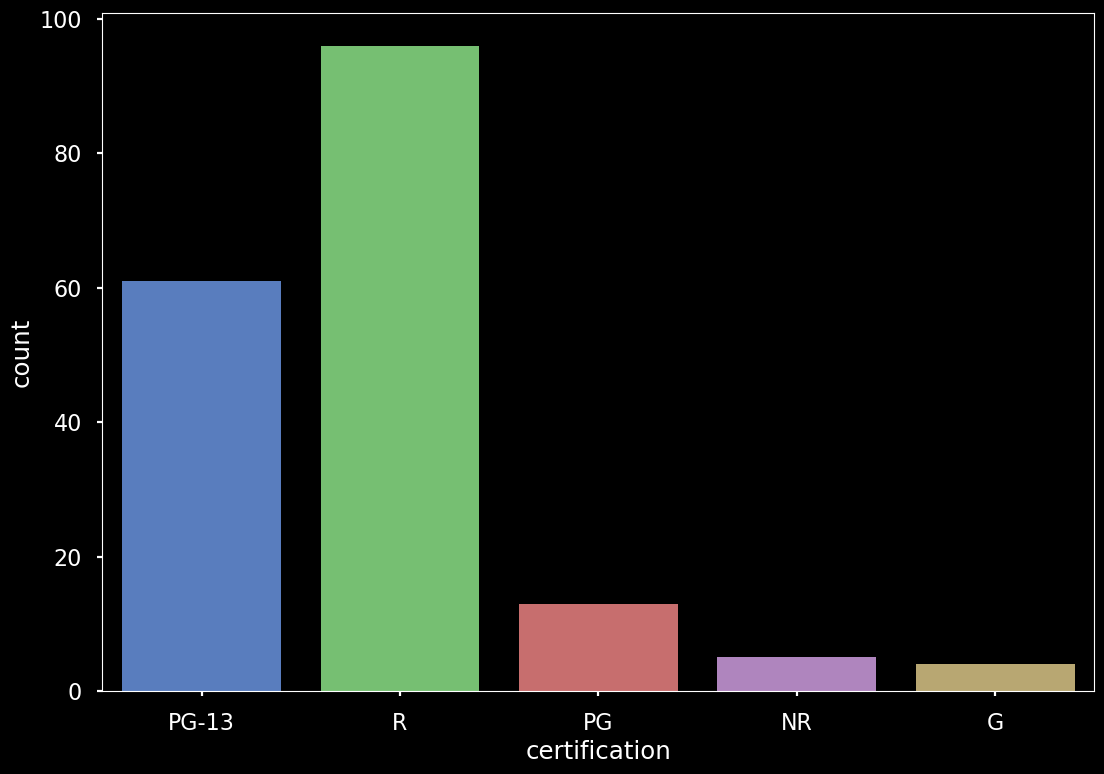

In [32]:
# Seaborn countplot
ax = sns.countplot(data=dfx, x="certification")

-  How many movies are there in each of the certification categories (G/PG/PG-13/R)?

 - R     =  96
 - PG-13  =  61
 - PG   =  13
 - NR    =  5
 - G  = 4

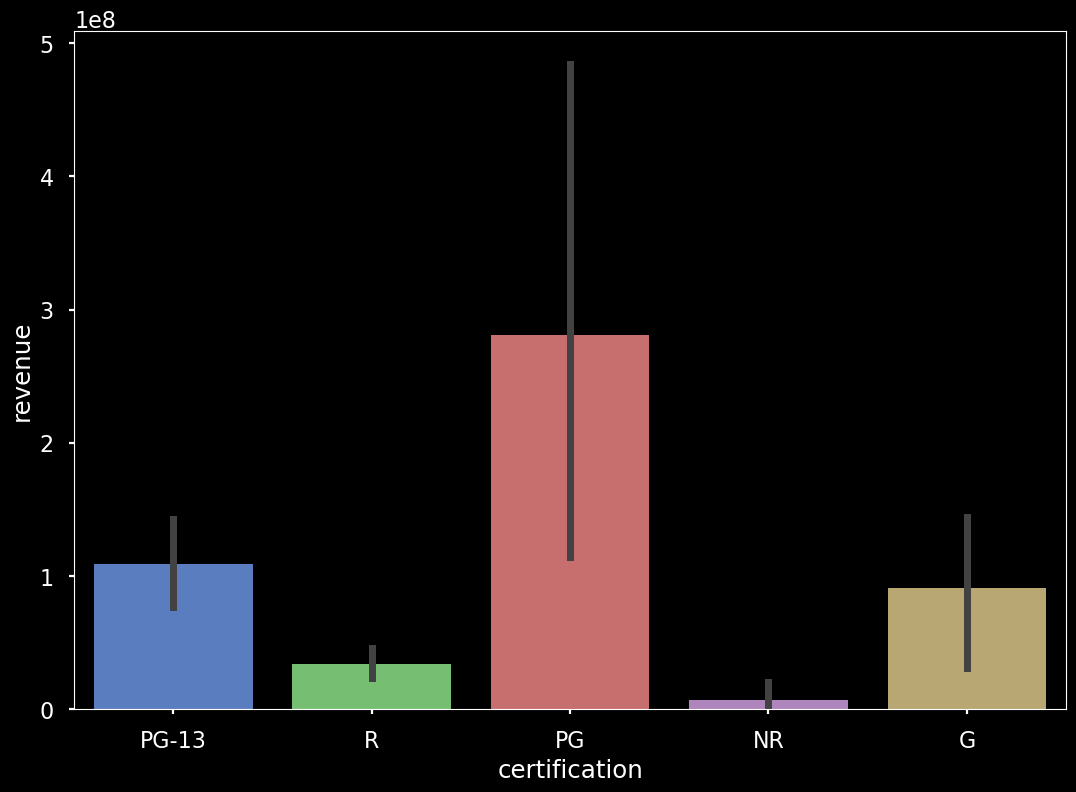

In [33]:
ax = sns.barplot(data=dfx, x='certification', y="revenue")

-  What is the average revenue per certification category?

 -  PG-13 = ~110m
 - R   = ~40m
  - PG = ~ 300m
  - G = ~ 100m
  -  NR = ~ 10m

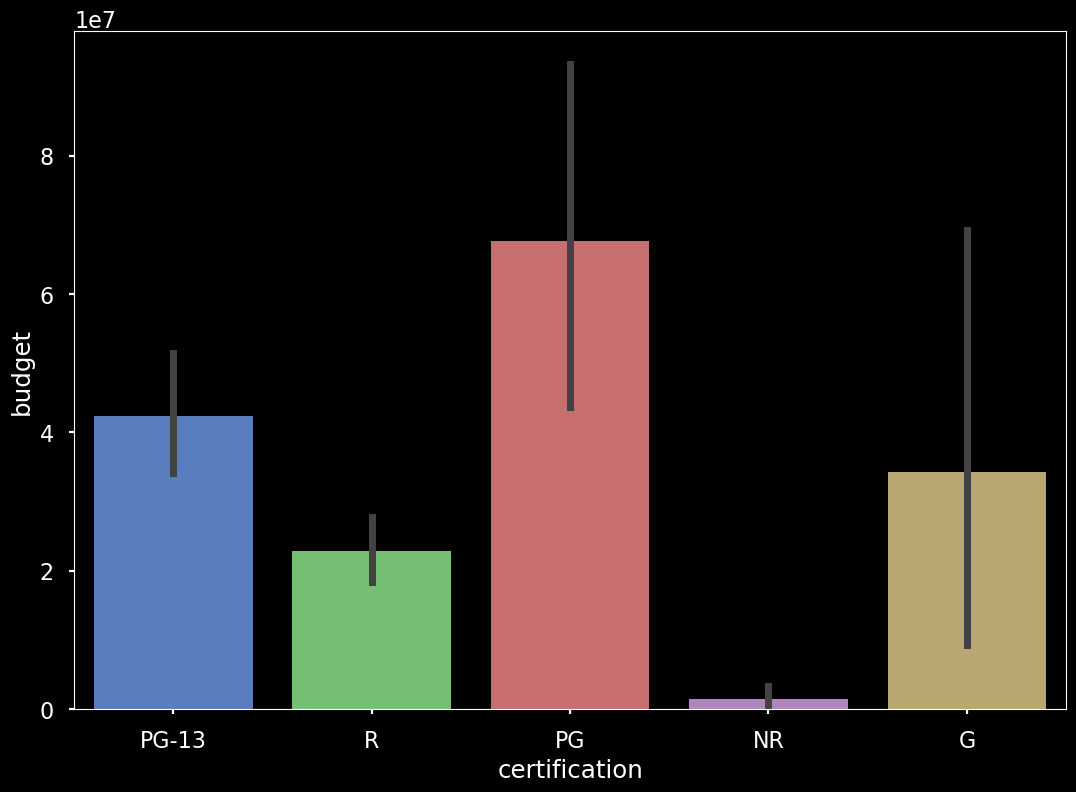

In [34]:
ax = sns.barplot(data=dfx, x='certification', y="budget")

### What is the average budget per certification category?

- PG-13 = ~42m 
- R = ~22m
- PG = ~63m
- NR = ~10m
- G = ~38m
